### Import data

In [1]:
# Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from utils import *

In [2]:
data = pd.read_excel('dataset.xlsx')
df = data.copy()
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### EDA

In [6]:
print(cl('------------------------------------------------------------------------', attrs=['bold']))
print(cl('COLUMNS INFORMATION', attrs=['bold'], color='green'))
print(cl('The dataset has {} cases and {} features'.format(*df.shape), attrs=['bold']))
print(cl('------------------------------------------------------------------------', attrs=['bold']))
null_column_report_df(df)

------------------------------------------------------------------------
COLUMNS INFORMATION
The dataset has 5644 cases and 111 features
------------------------------------------------------------------------
Number of columns with null values:
105



,Column,Total_Null_Records,Percent_Null_Records
0,Hematocrit,5041,0.89
1,Hemoglobin,5041,0.89
2,Platelets,5042,0.89
3,Mean platelet volume,5045,0.89
4,Red blood Cells,5042,0.89
...,...,...,...
100,HCO3 (arterial blood gas analysis),5617,1.00
101,pO2 (arterial blood gas analysis),5617,1.00
102,Arteiral Fio2,5624,1.00
103,Phosphor,5624,1.00


In [9]:
#Relation Target/Variables
#Création des sous ensemble positif et negatif
target = "SARS-Cov-2 exam result"
positive_df = df[df[target] == 'positive']
negative_df = df[df[target] == 'negative']


In [11]:
missing_rate = df.isna().sum()/df.shape[0] 
#print(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88) ])
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88) ]
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75) ]

C:\Users\a844026\AppData\Local\Temp\ipykernel_8020\223105035.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col],label='positive')
C:\Users\a844026\AppData\Local\Temp\ipykernel_8020\223105035.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col],label='negative')


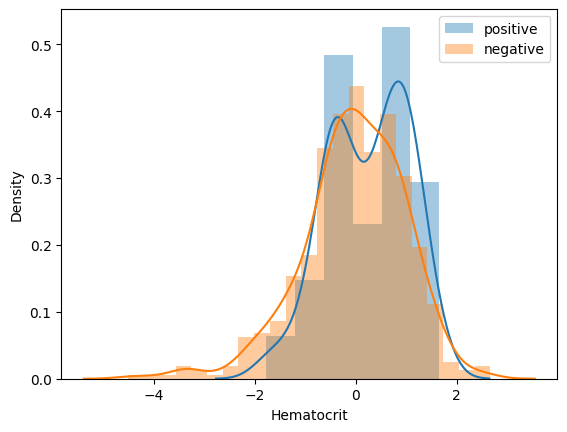

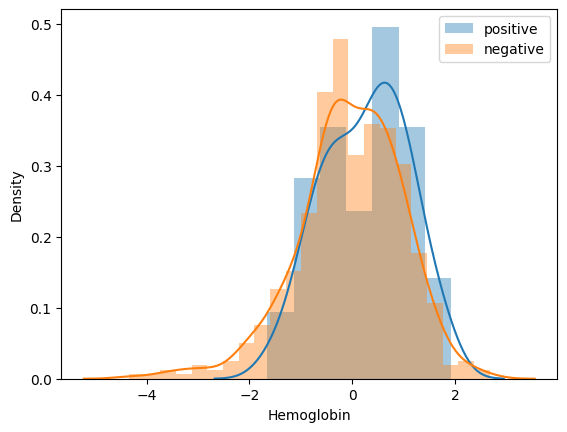

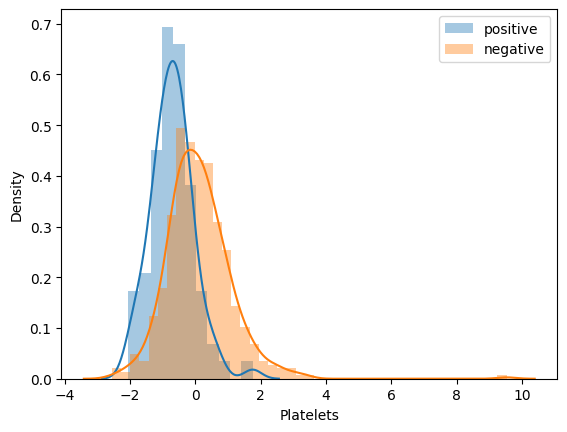

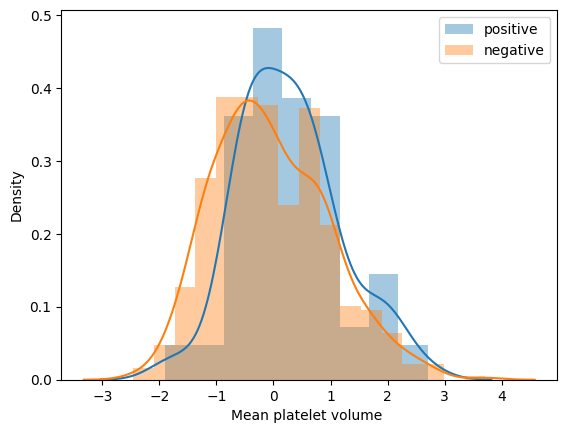

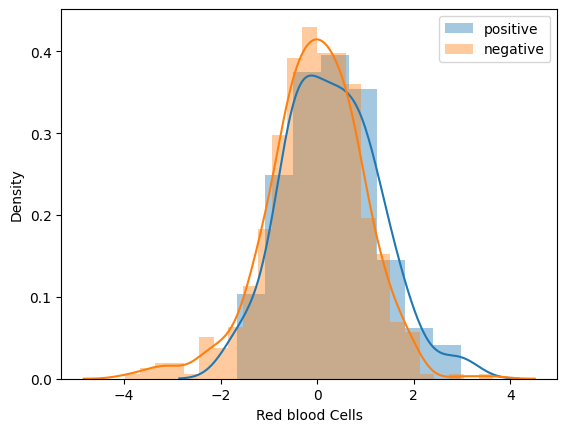

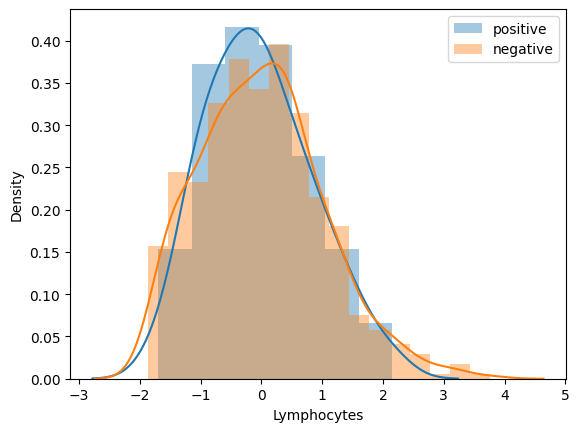

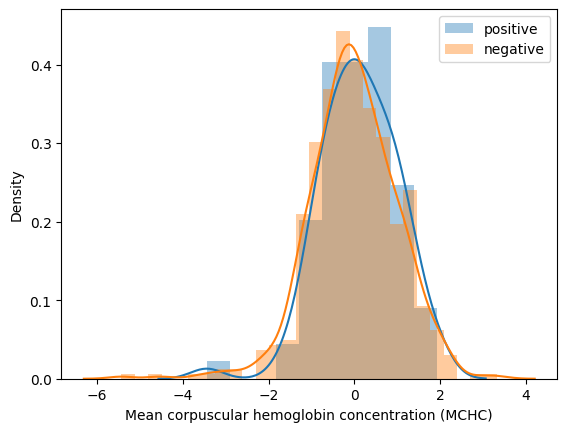

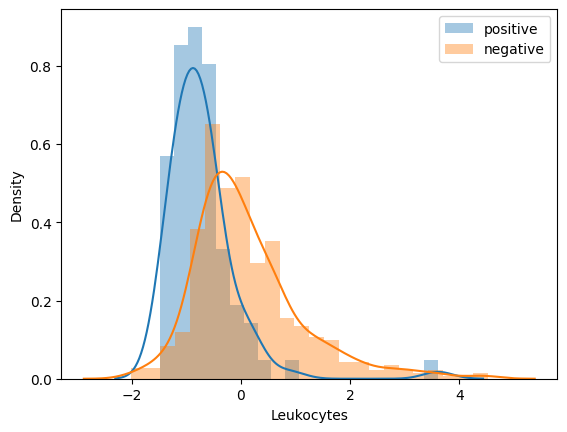

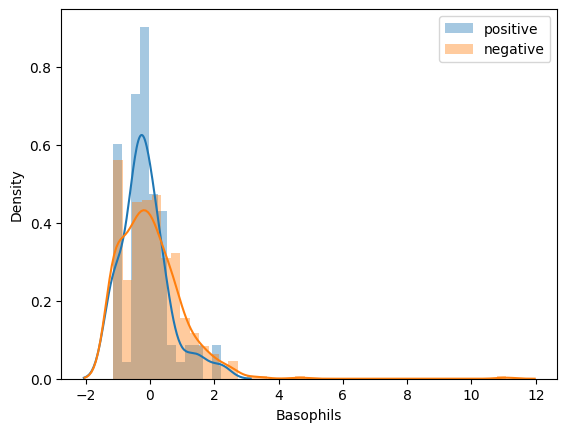

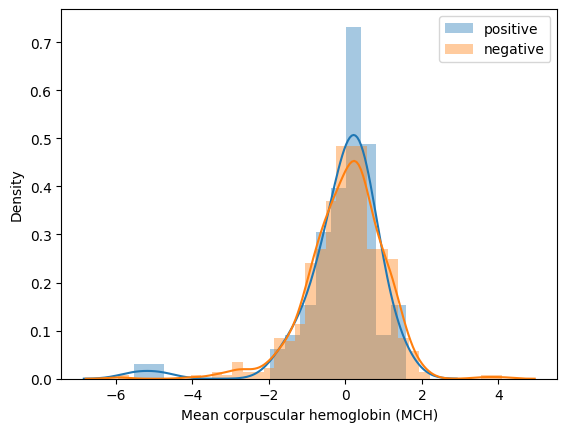

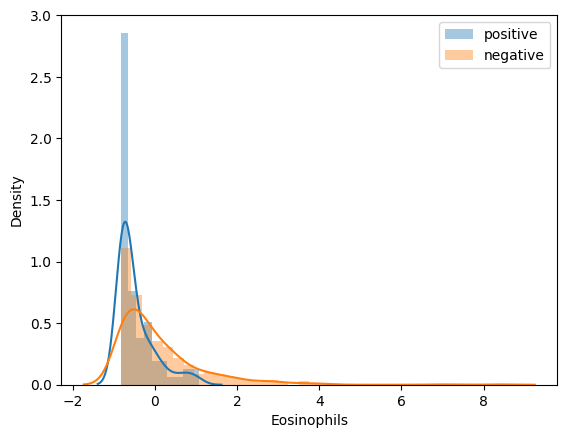

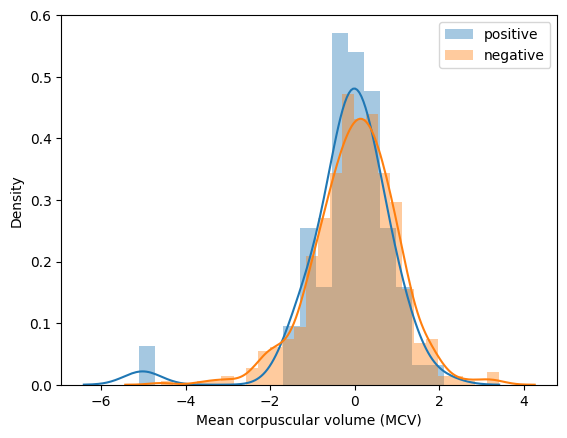

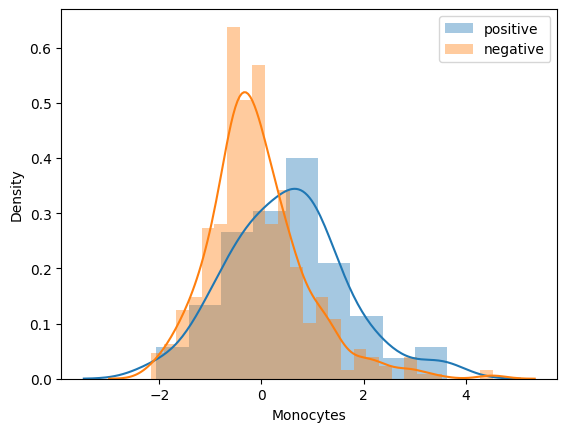

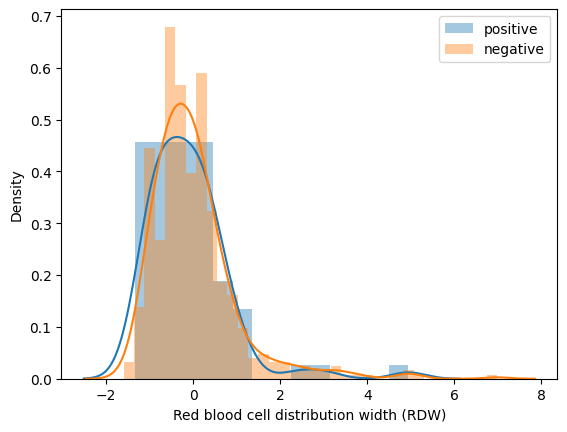

In [12]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col],label='positive')
    sns.distplot(negative_df[col],label='negative')
    plt.legend()


In [14]:
print(pd.crosstab(df[target], df['Influenza A']))


Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112


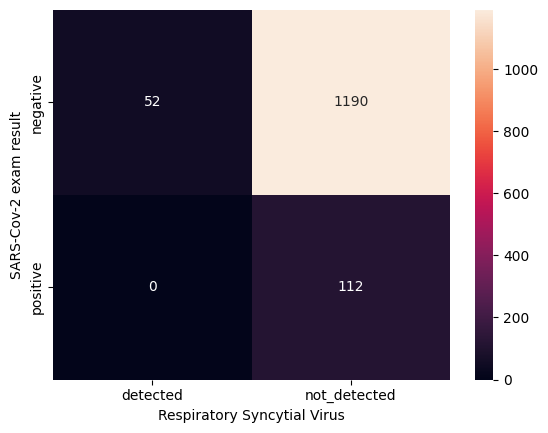

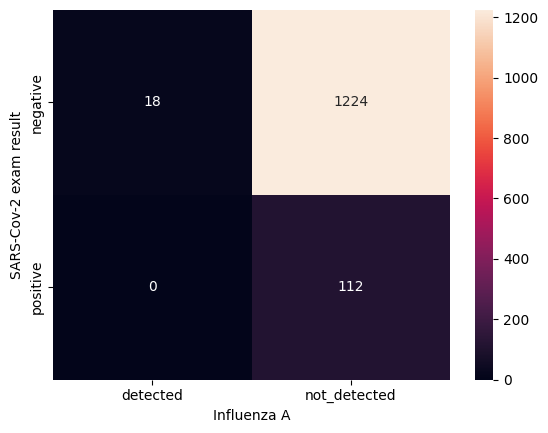

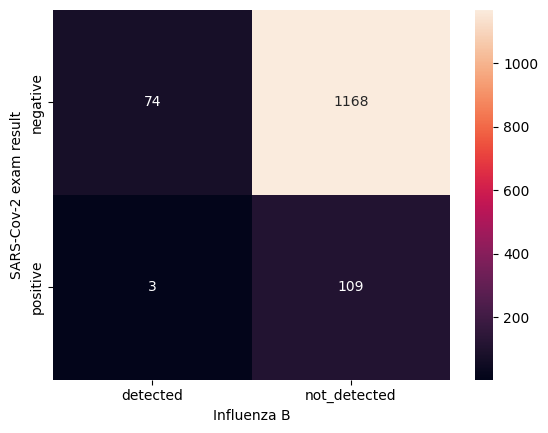

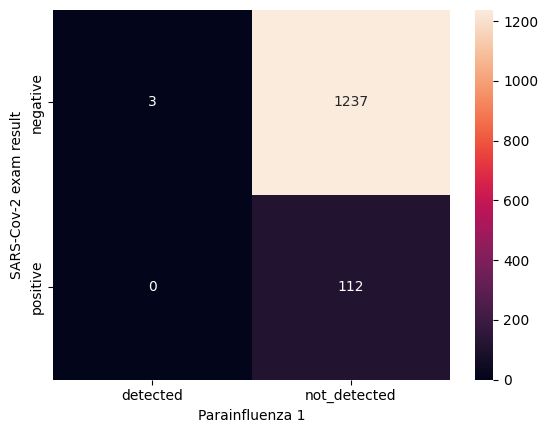

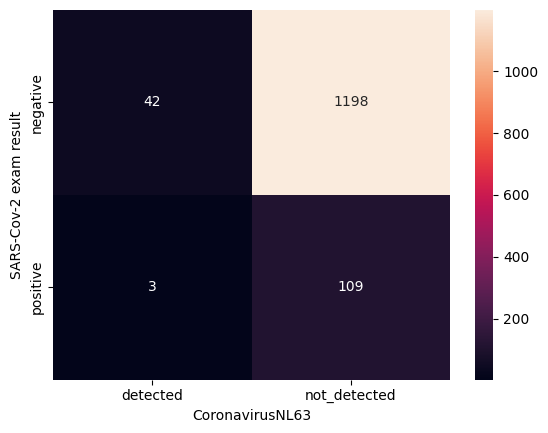

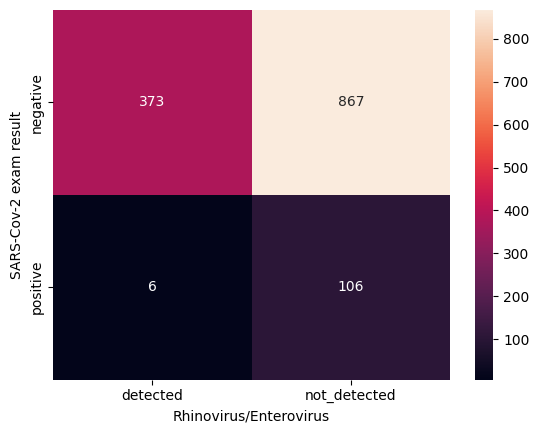

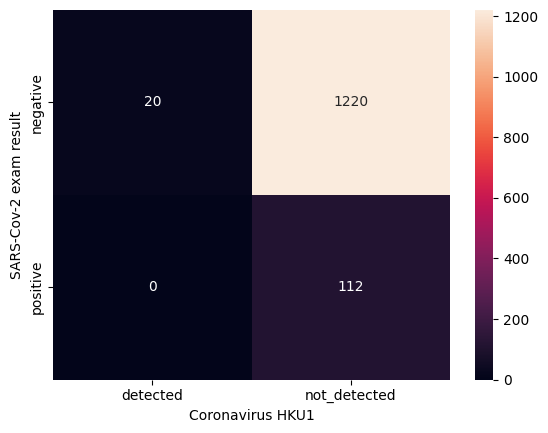

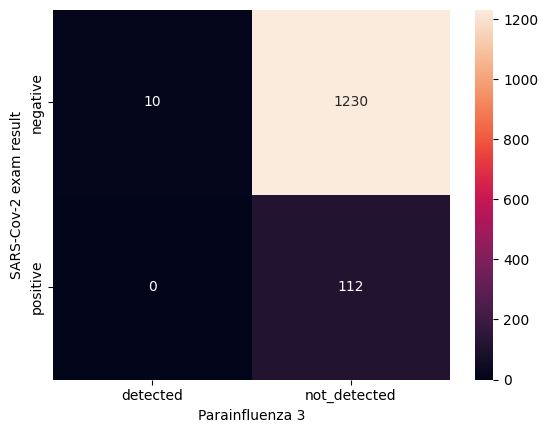

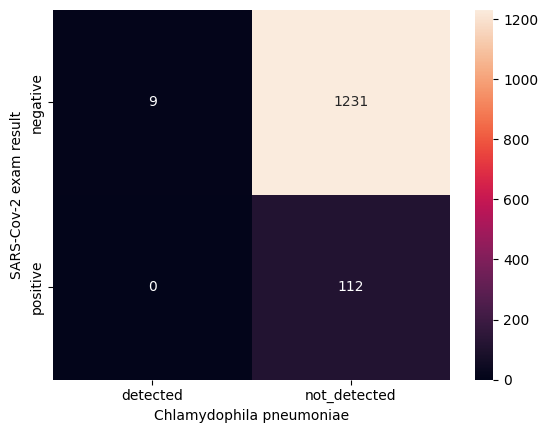

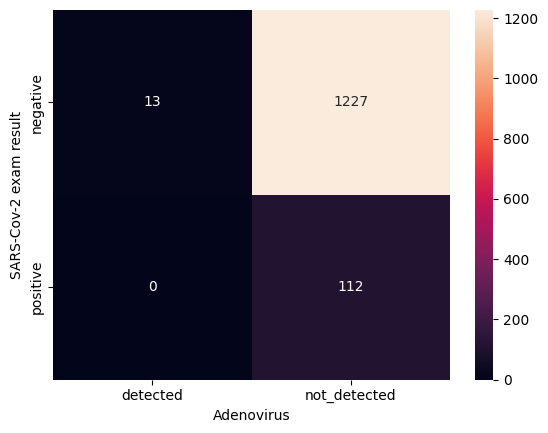

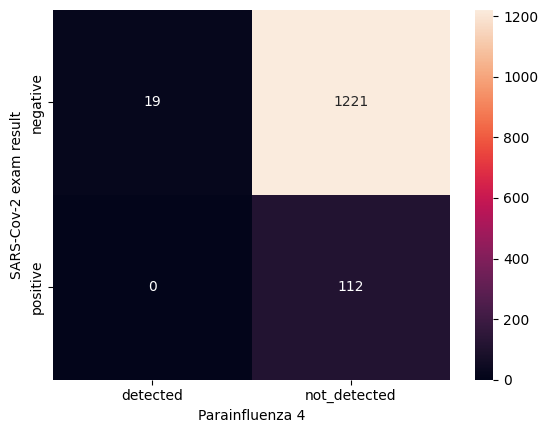

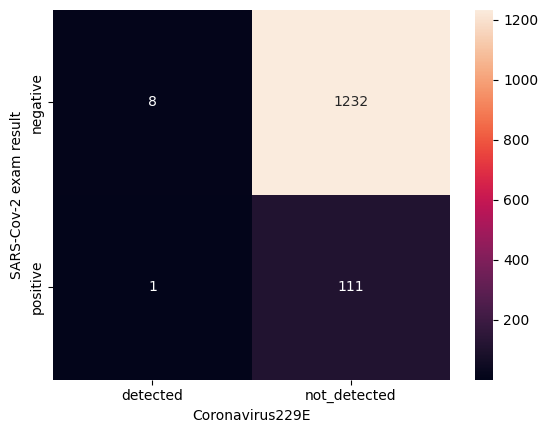

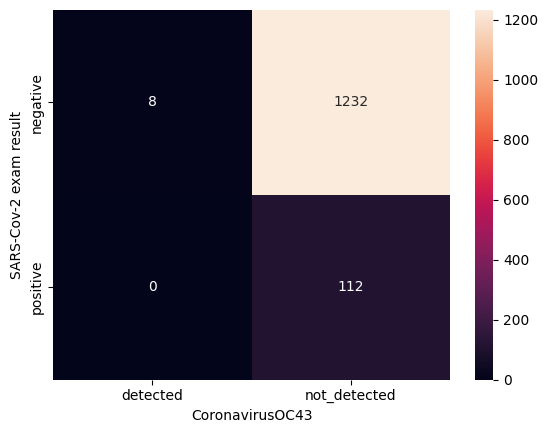

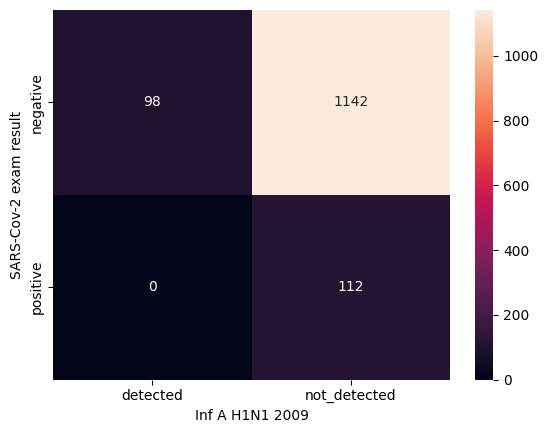

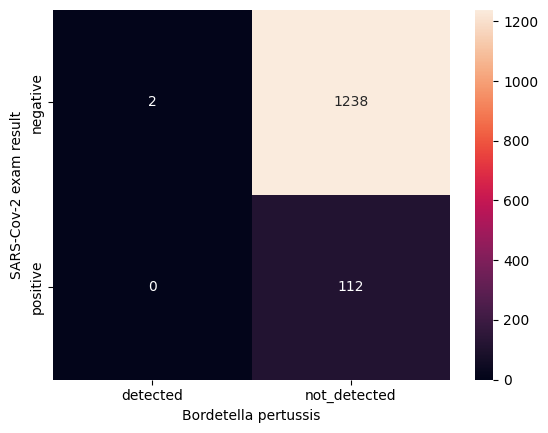

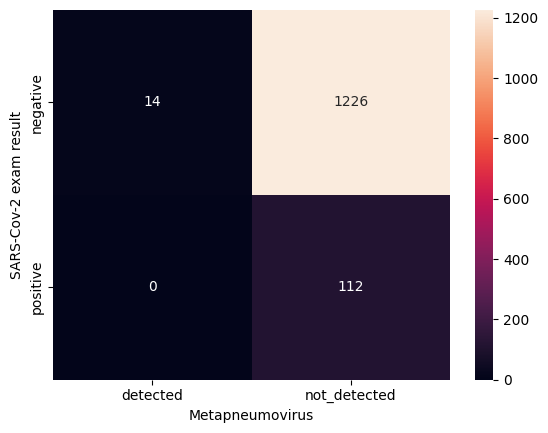

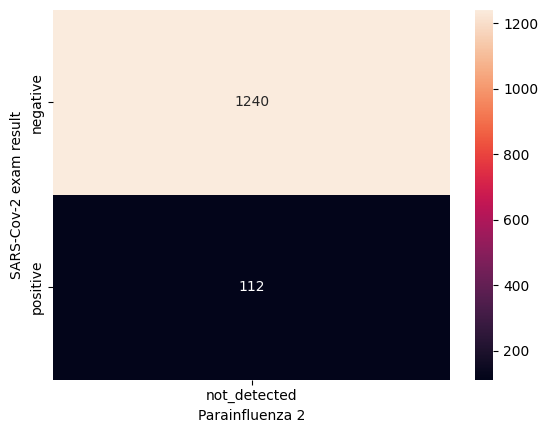

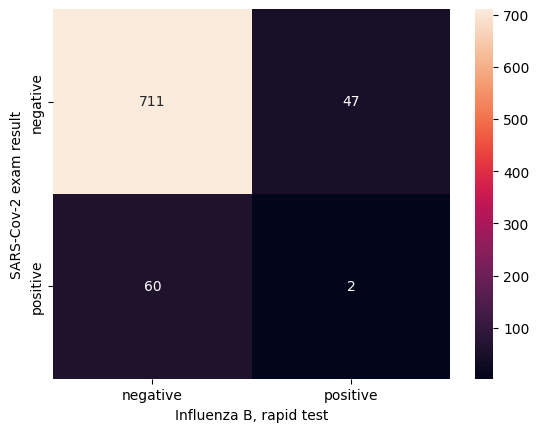

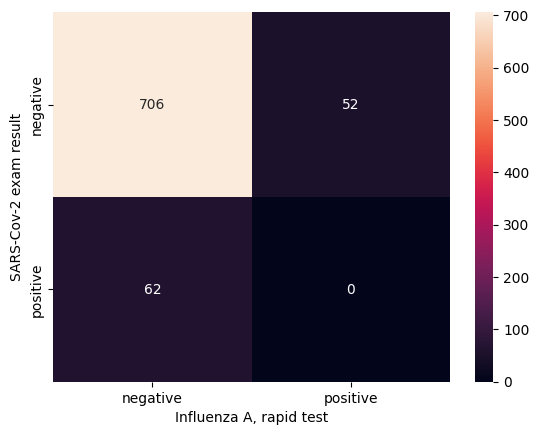

In [15]:
for col in viral_columns:
     plt.figure()
     sns.heatmap(pd.crosstab(df[target], df[col]), annot=True, fmt='d')

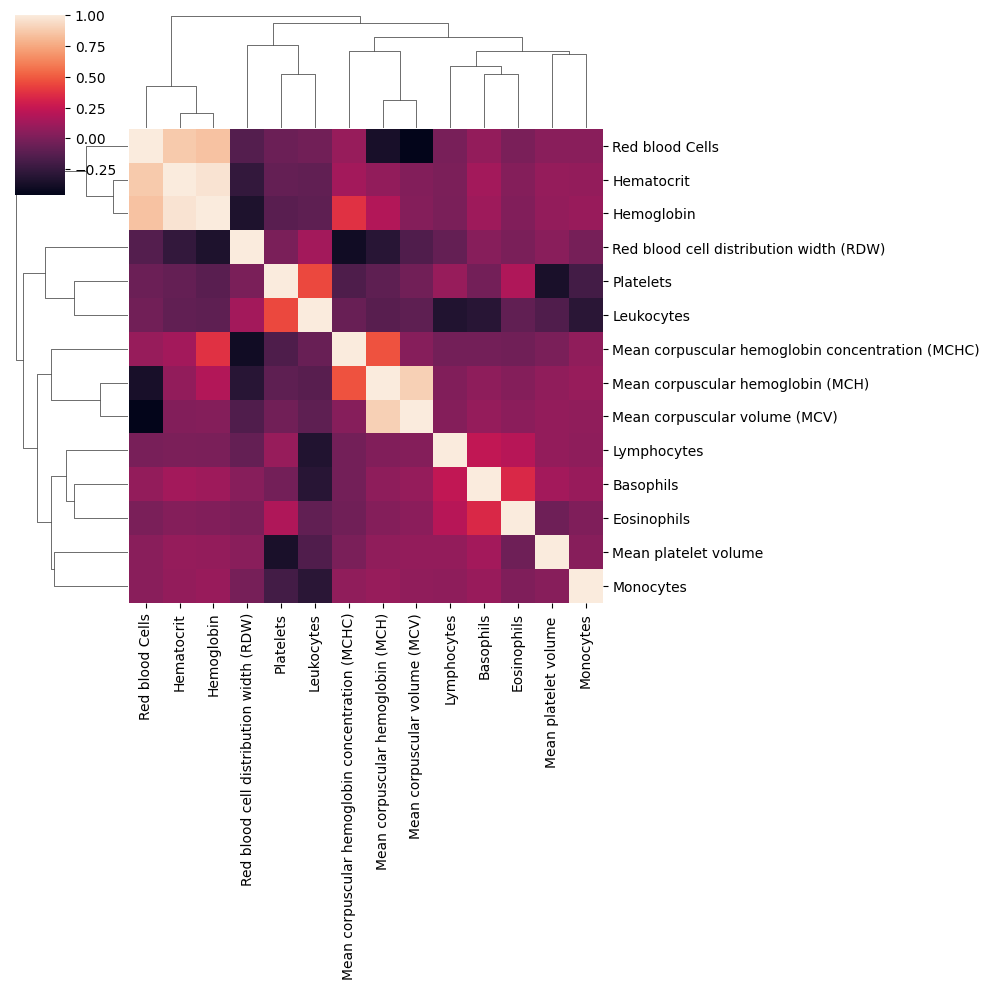

In [16]:
sns.clustermap(df[blood_columns].corr())

### Cleaning , splitting into train and test

In [27]:
from sklearn.model_selection import train_test_split

df = data.copy()
print(f"Dataset Shape: {df.shape}")

missing_rate = df.isna().sum()/df.shape[0] 
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result'] 
df = df[blood_columns + viral_columns + key_columns]
print(f"Dataset Shape before: {df.shape}")

print()
train, test = train_test_split(df,test_size=0.2,random_state=0)
print(train[target].value_counts())
print()
print(test[target].value_counts())

Dataset Shape: (5644, 111)
Dataset Shape before: (5644, 33)

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64


In [29]:
def encodage(df1):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    df = df1.copy()
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

def imputation(df) :
   df =df.dropna(axis=0)
   return df


def feature_engineering(df):
    df['is_sick'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

def preprocessing(df):
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    X = df.drop(target, axis=1)
    y = df[target]
    return X, y

X_train, y_train = preprocessing(train)
X_test, y_test = preprocessing(test)

### Modelisation

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve 



In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
preprocesor = make_pipeline(PolynomialFeatures(3,include_bias=False),SelectKBest(f_classif,k=26))
AdaBoost = make_pipeline(preprocesor, AdaBoostClassifier(random_state=0) )
SVM = make_pipeline(preprocesor, StandardScaler(),SVC(random_state=0) )
KNN = make_pipeline(preprocesor,StandardScaler(), KNeighborsClassifier() )
RandomForest = make_pipeline(preprocesor, RandomForestClassifier(random_state=0) )

In [39]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# hyper_params = {'adaboostclassifier__base_estimator' : [ExtraTreesClassifier()],
#                 'adaboostclassifier__n_estimators' : range(125,145),
#                 'adaboostclassifier__learning_rate' : [0.9,1],
#                 'adaboostclassifier__algorithm' : ['SAMME'],
#                 'pipeline__polynomialfeatures__degree':[3],
#                 'pipeline__selectkbest__k': range(25, 30)}
# best_hyper_params = {'pipeline__selectkbest__k': range(28),
#                      'pipeline__polynomialfeatures__degree': 3,
#                      'adaboostclassifier__n_estimators': 126,
#                      'adaboostclassifier__learning_rate': 1,
#                      'adaboostclassifier__base_estimator': ExtraTreesClassifier(),
#                      'adaboostclassifier__algorithm': 'SAMME'}
hyper_params = {'adaboostclassifier__estimator' : [ExtraTreesClassifier()],
                'adaboostclassifier__n_estimators' : [126],
                'adaboostclassifier__learning_rate' : [1],
                'adaboostclassifier__algorithm' : ['SAMME'],
                'pipeline__polynomialfeatures__degree':[3],
                'pipeline__selectkbest__k': [28]}

grid = RandomizedSearchCV(AdaBoost, hyper_params, scoring='recall', cv=4,
                          n_iter=1)
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('polynomialfeatures',
                                                               PolynomialFeatures(degree=3,
                                                                                  include_bias=False)),
                                                              ('selectkbest',
                                                               SelectKBest(k=26))])),
                                             ('adaboostclassifier',
                                              AdaBoostClassifier(random_state=0))]),
                   n_iter=1,
                   param_distributions={'adaboostclassifier__algorithm': ['SAMME'],
                                        'adaboostclassifier__estimator': [ExtraTreesClassifier()],
                                        'adaboostclassifier__learning_rate': [1],
                                        'adaboostclassifier__n_estimators': [126],
                                        'pipeline__polynomialfeatures__degree': [3],
                                        'pipeline__selectkbest__k': [28]},
                   scoring='recall')

[[90  5]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.58      0.44      0.50        16

    accuracy                           0.87       111
   macro avg       0.75      0.69      0.71       111
weighted avg       0.86      0.87      0.87       111



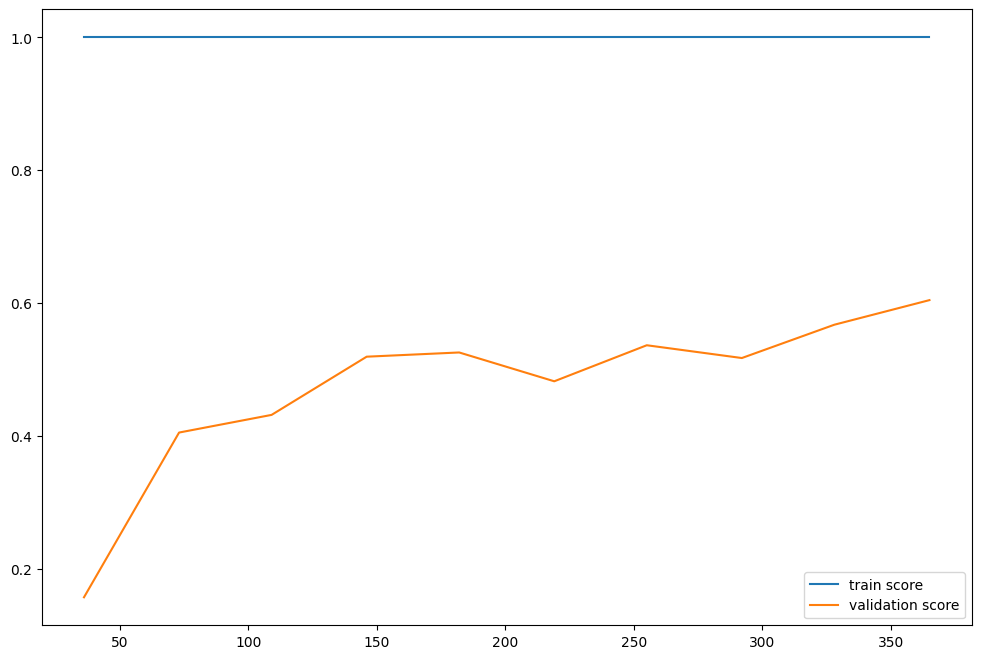

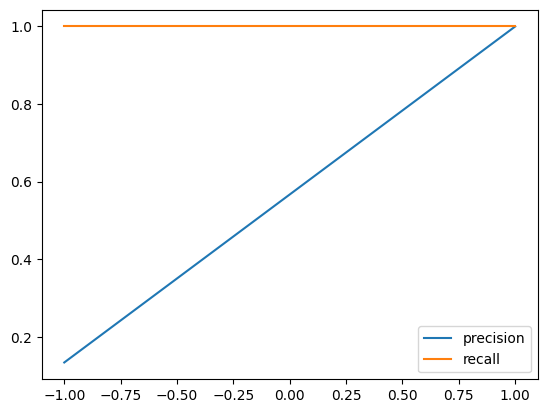

In [40]:
def evaluation(model) : 
    model.fit(X_train ,y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, train_sizes = np.linspace(0.1,1,10), scoring='f1' )
    
    plt.figure(figsize = (12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='validation score')
    plt.legend()
    
evaluation(grid.best_estimator_)
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train, grid.best_estimator_.decision_function(X_train))
plt.figure()
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')

plt.legend()

In [41]:
def model_final(model, X, threshold):
    return model.decision_function(X) > threshold

from sklearn.metrics import recall_score
y_predict = model_final(grid.best_estimator_, X_test, threshold=-0.5)
print(f1_score(y_test, y_predict) )
print(recall_score(y_test,y_predict))

0.5
0.4375


In [42]:
SVM = make_pipeline(preprocesor, StandardScaler(), SVC(random_state=0))
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}


grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=20)

grid.fit(X_train, y_train)

print(grid.best_params_)
y_pred = grid.predict(X_test)

y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)
print(classification_report(y_test, y_pred))
print(recall_score(y_test, y_pred))

{'svc__gamma': 0.0005, 'svc__C': 1000, 'pipeline__selectkbest__k': 56, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.94      0.85      0.90        95
           1       0.44      0.69      0.54        16

    accuracy                           0.83       111
   macro avg       0.69      0.77      0.72       111
weighted avg       0.87      0.83      0.84       111

0.6875
